## Genetic optimization of the Eggholder Function

### Step 1: Plotting the Function

In [2]:
%matplotlib notebook

In [3]:
from mpl_toolkits import mplot3d

In [4]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


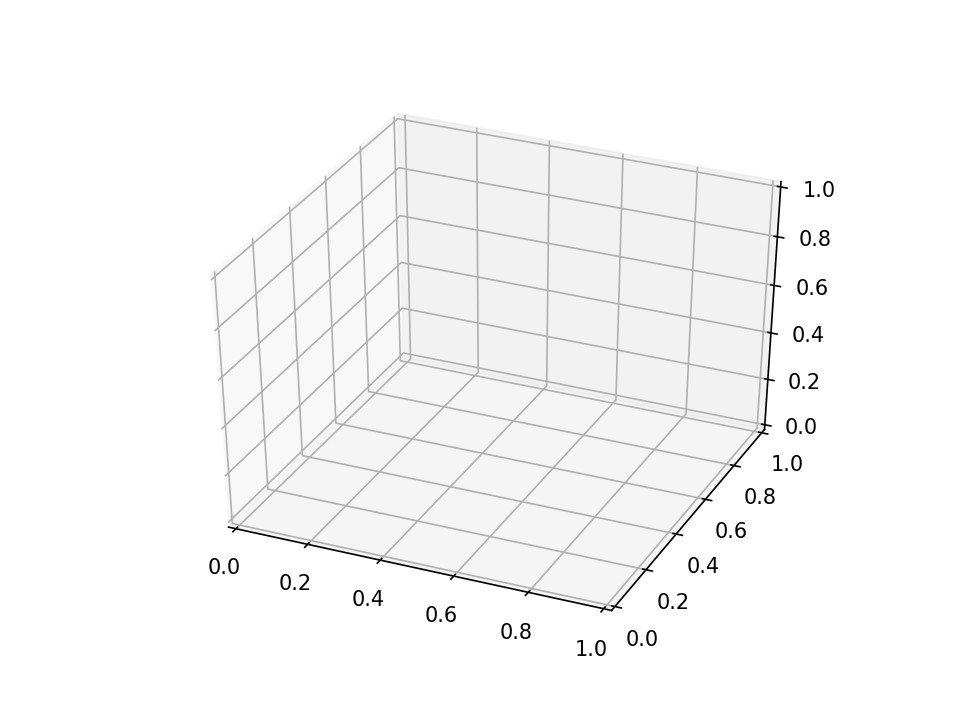

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [6]:
def eggholder_func(x,y):
    return (-(y+47.0)*np.sin(np.sqrt(abs(x/2.0+(y+47.0)))))-x*np.sin(np.sqrt(abs(x-(y+47.0))))

In [7]:
x = np.linspace(-512,512,200)
y = np.linspace(-512,512,200)

In [8]:
X,Y = np.meshgrid(x,y)
Z = eggholder_func(X,Y)

<IPython.core.display.Javascript object>


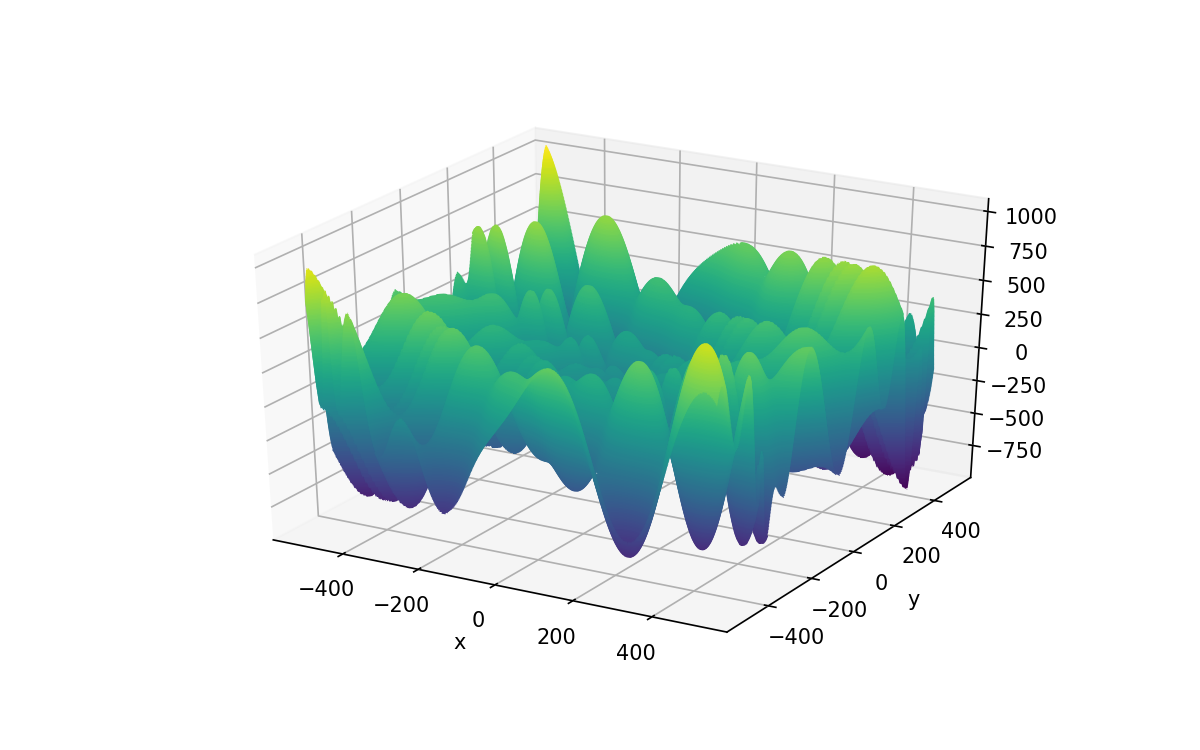

Text(0.5, 0, 'y')

In [15]:
plt.rcParams["figure.figsize"] = [8,5]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 200)
ax.set_xlabel('x')
ax.set_ylabel('y')

The plots are not static and there is no component of interactivity, Let's try building interactive plots.

### Step 2: Interactive Plots

In [45]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [50]:
fig3 = go.Figure(data=[go.Surface(z=Z)])
fig3.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig3.update_layout(title='Eggholder Function', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig3.show()

In [49]:
fig2 = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig2.update_layout(title='Eggholder Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig2.update_xaxes(range=[-512, 512])
fig2.update_yaxes(range=[-512, 512])
fig2.show()

In [81]:
#Initial code not working on this currently

import random

DIMENSIONS=2

BOUND_LOW,BOUND_UP=-512.0,512.0

def randomFloat(low,up):
    return [random.uniform(l,u) for l, u in zip([low]*DIMENSIONS, [up]*DIMENSIONS)]

from deap import tools
from deap import base
from deap import creator

toolbox = base.Toolbox()

creator.create("FitnessMin",base.Fitness,weights=(-1.0,))

creator.create("Individual",list,fitness=creator.FitnessMin)

toolbox.register("attrFloat",randomFloat,BOUND_LOW,BOUND_UP)

toolbox.register("individualCreator",tools.initIterate,creator.Individual,toolbox.attrFloat)

toolbox.register("populationCreator",tools.initRepeat,list,toolbox.individualCreator)

from sympy import solve,Eq,symbols

x,y = symbols('x y')

eq1 = Eq( 4*(x**3) + 4*x*y - 42*x + 2*(y**2) - 14,0)
eq2 = Eq( 4*(y**3) + 4*x*y - 26*y + 2*(x**2) - 22,0)

sympy.nsolve((4*(x**3) + 4*x*y - 42*x + 2*(y**2) - 14,4*(y**3) + 4*x*y - 26*y + 2*(x**2) - 22),(x,y),(3,3))